In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

from neuron import NeuronParam, SimpleNeuron
from synapse import Synapse
from encoding import RF_convolution, encode, RF_kernel
from parameter import TrainParam
from STDP import stdp, stdp_update

In [2]:
np.random.seed(1)
fixed_weight = np.random.uniform(0,1.,(3,256))

In [3]:
T = 150
dt = 1
t_past = -20
t_future = 20


n1 = 16*16 # of neurons in layer 1
n2 = 3 # of neurons in layer 2

wmin=-1.2
wmax=2.
tau_past = 10
tau_future = 10
A_past = 0.3
A_future = 0.8

lr = 0.02

train_param = TrainParam(T = T,
                         dt = dt)
    
neuron_param = NeuronParam(t_refractory = 30,
                           V_rest = 0,
                           V_thr = 50,
                           V_min = -5,
                           V_inhibit = -500,
                           leak = 0.75) 

learning_rule = lambda t : stdp(t,
                                tau_past = tau_past, 
                                tau_future = tau_future, 
                                A_past = A_past, 
                                A_future = A_future)

update = lambda w,dw,scale : stdp_update(w,dw,scale,lr,wmin,wmax)

In [4]:
timeline = np.arange(0,T+dt,dt)
layer = [SimpleNeuron(neuron_param) for _ in range(n2)]
synapse = Synapse(n1,layer)
synapse.random_initialize(0,wmax*0.5)
synapse.weight = fixed_weight

In [15]:
spikerecord = np.array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]])

In [24]:
weight_before = np.array([[ 4.27426541e-01,  7.26544883e-01,  6.02798542e-03,
         1.27618725e-01, -2.74979204e-02, -8.17543059e-02,
         1.18895869e-02,  1.70719055e-01,  2.21774385e-01,
         3.63403609e-01,  2.44135109e-01,  5.09373466e-01,
         3.00278318e-02,  8.81434814e-01,  4.25939284e-02,
         6.79206210e-01,  4.17304802e-01,  5.58689828e-01,
         1.40386939e-01,  1.98101489e-01,  6.20744569e-01,
         7.88261576e-01,  1.33424178e-01,  5.12322616e-01,
         6.96389152e-01,  7.14606664e-01, -9.49557886e-02,
        -1.40945217e-01,  1.69830420e-01,  8.78142503e-01,
         9.83468338e-02,  4.31208233e-01,  9.61652658e-01,
         5.41812739e-01,  6.95745200e-01,  3.20496608e-01,
         6.90384911e-01,  6.58337847e-01, -1.55585658e-01,
         5.74106300e-01,  8.19653676e-01,  5.75929980e-01,
         1.18179519e-01,  7.94605518e-01,  1.13771479e-01,
         4.52483065e-01,  9.11822758e-01,  3.02802489e-01,
         1.25439013e-01,  1.48355484e-01,  1.93669579e-02,
         6.78835533e-01,  2.11628116e-01,  2.65546659e-01,
         3.11573159e-01, -1.26637455e-01,  3.94117605e-01,
        -3.32714251e-02,  5.89305537e-01,  7.08307314e-01,
         1.12552749e-01,  4.14055988e-01,  6.94400158e-01,
         2.41569251e-01, -1.30046541e-01,  3.55896406e-01,
         6.63794645e-01,  5.14889112e-01,  9.44594756e-01,
         5.86555041e-01,  9.03401915e-01, -4.25252959e-02,
        -4.07236527e-02,  8.07391289e-01,  4.01915165e-01,
         1.75233176e-01,  9.28948035e-01,  3.63958808e-01,
         5.70812103e-01,  5.45997985e-01,  7.03306091e-01,
         4.43672207e-01,  5.70942434e-01,  3.48898342e-01,
         2.69927892e-01,  8.95886218e-01,  4.38477144e-01,
         9.64840047e-01,  6.63441498e-01,  6.39804818e-01,
         1.25521985e-01,  9.56396258e-01,  4.57124222e-01,
         3.98389614e-01,  2.28136803e-01,  5.70269802e-02,
         7.23379521e-01,  3.93679487e-01, -1.77129673e-01,
         4.37144914e-01,  3.26644902e-01,  5.36790160e-01,
         7.17743358e-01,  3.68123647e-01,  9.26373078e-01,
         4.50478345e-01,  4.18907312e-02,  9.32038692e-01,
         5.10896918e-01,  8.17322850e-01, -7.65949165e-03,
        -4.28642504e-02,  7.52595463e-01,  5.16818161e-01,
        -1.13999827e-01,  5.75463053e-01,  5.73876188e-01,
         9.26992719e-01,  7.24660029e-01,  1.29817445e-01,
         3.51838251e-02,  4.92668930e-02,  3.95723106e-02,
         6.62110676e-02,  6.80027949e-01,  3.58831064e-01,
         3.72821979e-01,  6.62030892e-01, -5.58266849e-02,
         9.91836790e-02,  4.05759271e-01,  7.89595748e-01,
         3.88039954e-01,  2.87974448e-02,  8.13667644e-01,
         2.38199324e-01,  8.11412816e-01,  4.10033071e-01,
         8.63541855e-01,  5.67121643e-01,  3.76240234e-01,
        -4.35447743e-02, -1.20082310e-01, -5.86565443e-02,
        -1.35448121e-01, -7.25058709e-02,  4.57093386e-02,
         5.38537633e-01,  5.69186694e-01,  3.72606257e-02,
        -8.82470578e-02,  9.74099767e-01,  5.91502149e-01,
         2.32932347e-02,  2.63873021e-01,  7.43825854e-01,
         1.54294811e-02,  4.01358927e-01,  7.90019989e-01,
         6.66828801e-01,  5.98477591e-02,  3.13769714e-01,
         4.46398885e-01,  8.36680229e-01,  1.67199963e-01,
         3.16038589e-02,  8.27739407e-02,  4.86345111e-01,
         6.06329462e-01,  5.78307357e-01,  3.17362409e-01,
         9.88616154e-01,  5.79745219e-01,  2.00141173e-01,
         3.70948219e-01,  5.65334431e-01,  4.89232893e-01,
         8.49195577e-02,  7.23234995e-02,  3.78860772e-01,
         6.32730064e-01,  2.10174010e-01,  7.52755554e-01,
        -1.13463519e-01,  8.03150986e-02,  8.04754564e-01,
         1.93434283e-01,  6.39460881e-01,  5.24670309e-01,
         9.24807970e-01,  8.32967705e-02, -1.14038909e-01,
         5.55065963e-01,  7.83313287e-01,  9.13696914e-01,
         9.38994242e-01,  1.39515730e-02,  2.34362086e-01,
         4.36778357e-01,  7.69016321e-01,  7.70176119e-01,
         3.76653188e-01,  9.15606350e-01,  6.41566209e-01,
         3.90007714e-01,  4.85990667e-01,  6.17989130e-01,
         3.84646058e-01,  9.33308317e-01,  9.22380876e-01,
         4.02616877e-01,  9.66332519e-01,  1.91852065e-01,
        -3.69972076e-02, -2.57606475e-02,  3.30347078e-01,
        -1.52358701e-01,  7.71347230e-01,  6.50849854e-01,
         2.08885188e-02,  1.81589197e-01,  3.36995620e-01,
         1.44859584e-01,  8.13789698e-01,  3.52960002e-01,
         9.40107482e-01,  5.82014180e-01,  8.78831984e-01,
         6.64734445e-01,  7.25392319e-01,  2.79880266e-01,
         3.66346816e-01,  6.18603591e-01,  1.05718852e-01,
         3.10253523e-01,  4.19110308e-01,  1.55332756e-02,
         5.93481408e-01,  4.33676349e-01,  8.07360529e-01,
         3.26318296e-01,  8.96871301e-01,  5.82062455e-01,
         9.64623035e-03,  6.11779489e-01,  4.36401559e-01,
        -1.20069994e-01,  2.45131320e-01,  5.03240990e-01,
         7.42065638e-01, -1.73419022e-01,  8.00051039e-01,
         2.01646919e-01,  9.76818034e-01,  6.12435691e-01,
         8.36543525e-01],
       [ 5.92403458e-01,  6.43544358e-01,  3.10350180e-01,
         6.05353043e-01,  7.65153621e-01,  8.71197514e-01,
         7.70108989e-01,  7.14267906e-01,  8.77235108e-01,
         3.46684589e-01,  6.87565550e-01,  4.72216201e-01,
         4.04872729e-01,  4.32985327e-01,  4.19502573e-01,
         3.39717778e-01,  6.37878951e-01,  4.49899507e-01,
         9.82982477e-01,  6.92683891e-01,  2.22685497e-01,
         4.46421566e-01,  3.64672665e-01,  8.10213070e-01,
         8.90985861e-01,  9.14370169e-01,  6.77893356e-01,
         2.92943724e-01,  2.75445890e-01,  8.66369085e-01,
         5.45489128e-01,  8.15666472e-01,  5.90220571e-01,
         7.47426084e-01,  5.38939331e-01,  7.85582662e-01,
         5.87750868e-01,  4.86744144e-01,  3.66277130e-01,
         9.74958566e-02,  3.92375147e-01,  1.11123028e-01,
         9.87976877e-01,  2.02114794e-01,  8.21570616e-01,
         8.87499709e-01,  7.04824122e-01,  5.79235752e-01,
         1.65183533e-01,  4.70391469e-01,  2.25172051e-01,
         1.05039958e-01,  4.72511869e-01,  1.92269838e-01,
         7.96305553e-01,  7.89635525e-01,  1.37118294e-01,
        -9.10869926e-03,  2.04421823e-01,  5.10266718e-01,
         7.36926266e-01,  2.19480208e-01,  2.58865998e-01,
         8.51671875e-01,  2.95848718e-01,  4.96685067e-01,
         1.13666139e-01, -1.80327406e-02,  3.95857017e-01,
         3.57140987e-01,  3.26716441e-02,  5.01806232e-01,
         4.24010119e-01,  5.34137347e-01,  1.64983409e-01,
         7.59666418e-01,  2.40986225e-01,  5.22743089e-01,
         6.65296028e-01, -9.76695720e-02,  2.04362460e-01,
         7.52922376e-01,  7.24709608e-01,  4.18440593e-01,
         7.46608274e-01,  8.29805991e-01,  7.06406998e-01,
         7.34115444e-01,  9.87434018e-02,  6.60692937e-01,
         7.21998438e-01,  6.19979627e-01,  8.09296910e-01,
        -8.54287801e-02,  6.50238735e-01,  6.11728601e-01,
         1.39698393e-01,  1.37069299e-01,  5.12303317e-01,
         2.25297462e-01,  6.76588678e-01,  3.26146232e-01,
         7.85537396e-01,  9.92856008e-01,  3.15892414e-01,
         1.73576978e-01,  9.08564884e-01,  5.55794230e-01,
         8.54740371e-01,  5.16604400e-01,  8.73913025e-01,
         4.26070804e-01,  4.06425934e-01,  1.54279031e-02,
         2.35705171e-01, -9.37814327e-02,  4.03951795e-02,
         7.61360495e-01,  5.79103713e-02,  3.89636098e-01,
         8.75173066e-01,  7.04881603e-01,  7.02541246e-01,
         6.86368010e-02,  3.21904281e-01,  4.61577407e-01,
         8.69751708e-01,  8.39062252e-02,  1.27732902e-01,
         1.42173084e-01,  6.30172413e-01,  3.36975327e-01,
         7.97152210e-02,  5.23428854e-01,  2.32119947e-01,
         8.12727513e-01,  3.20026937e-01,  6.03349929e-02,
         4.73432449e-01,  7.23840429e-01,  2.61016124e-01,
         6.29858311e-01,  3.91141478e-01,  4.20951805e-01,
         8.39434321e-01,  6.83960891e-01, -8.76769334e-02,
         7.20660905e-01,  4.75978967e-01,  9.60766851e-01,
         2.38287423e-01,  2.77687820e-01,  8.58681416e-02,
         3.08618829e-01, -1.09812360e-02,  5.13786761e-01,
         6.82963237e-01,  5.76800496e-01,  6.46211381e-01,
         2.22454120e-01,  7.25851483e-01,  3.08768775e-01,
         8.33261094e-01,  6.36096339e-01,  1.73985199e-01,
         9.26616222e-02,  1.83326429e-02, -5.32750024e-02,
         3.38583814e-01, -6.65807723e-03, -9.22166512e-02,
         6.34861481e-01,  2.74850480e-01,  6.26938496e-01,
         3.32404827e-01,  3.30086747e-01,  3.58072507e-01,
         4.74003927e-01,  8.10847705e-01,  4.13605131e-01,
         9.10404631e-01, -8.29389520e-02,  6.53874343e-01,
         5.64138114e-03,  4.98513567e-01, -1.09635739e-01,
         4.18627283e-01, -1.16982043e-01,  8.31193785e-01,
         7.85402034e-01,  6.75966942e-01,  7.95274320e-01,
         1.57556739e-01,  1.88613986e-01,  2.00735176e-01,
         6.32130199e-01,  9.09157094e-01,  8.69955178e-01,
         5.91122459e-01,  6.11800409e-01,  7.89293205e-01,
         2.80873732e-01,  1.29850680e-01,  5.34301708e-02,
        -5.42949666e-04,  6.92610588e-01,  1.51036945e-01,
         2.68272922e-01,  8.32103573e-01,  3.29635034e-01,
         9.90735213e-01,  2.86181995e-01,  5.45712300e-01,
         3.40402045e-01,  9.17039200e-01,  3.89649364e-01,
         4.55293364e-01,  5.32359883e-01,  9.50097440e-01,
         6.10090515e-02,  7.32698582e-01,  9.03223663e-01,
         4.95291556e-02,  5.40693128e-01,  3.39673244e-01,
         8.70872008e-01,  5.75697619e-01,  7.04871456e-01,
         4.72070216e-01,  6.44145521e-01,  3.12449151e-01,
         3.71096238e-02,  5.93585613e-01,  3.33385246e-01,
         5.35243347e-01,  9.26692017e-01,  4.46199703e-01,
         2.70570987e-01,  3.92081764e-01,  9.41849527e-01,
         9.48027462e-01,  8.57359891e-01,  9.31805280e-01,
         2.53871561e-01,  1.16368607e-01,  2.53293268e-01,
         3.38552610e-01,  2.01840236e-01,  6.25193243e-01,
         4.35702781e-01,  8.30106341e-01,  2.11989587e-01,
         7.18007898e-01,  2.66068319e-01,  5.90294476e-01,
         3.70751337e-01],
       [-1.15694079e-01,  6.25763120e-02,  4.88318963e-01,
         3.21959880e-01,  5.28257483e-01,  1.97499022e-01,
         5.80430832e-01,  1.00661397e+00,  8.31600604e-01,
         6.03316427e-01,  9.82504702e-01,  9.04810636e-01,
         4.20026878e-01, -1.41489416e-01, -7.09065270e-02,
        -1.07317123e-01,  2.71733149e-01,  1.95434833e-01,
         7.95350034e-01,  1.67983293e-01,  9.78020299e-01,
         7.71685152e-01,  8.28254222e-01,  6.38917440e-01,
         6.73397820e-01,  4.84641223e-01,  1.89345276e-02,
         3.58429422e-01,  4.92071801e-01,  5.50091211e-01,
         2.88628343e-01,  2.88203206e-01, -3.52871449e-02,
        -1.52522594e-01,  7.61950000e-01,  3.28618058e-01,
         9.88208856e-01,  2.30403007e-01,  1.63886617e-01,
         3.48527130e-01,  5.87977096e-01,  2.95695343e-01,
         1.47298948e-01,  3.24010383e-01,  5.16095921e-01,
         6.77770403e-01,  5.94052785e-01, -3.91118377e-02,
        -1.36825395e-01,  5.33596260e-01,  8.13907263e-01,
         1.26037670e-02,  6.76841229e-01,  6.86808227e-01,
         2.69246754e-01,  7.34788687e-01,  4.64361085e-01,
        -1.74760162e-01,  4.84428446e-01,  8.70549096e-01,
         8.36697493e-01,  6.53602356e-01,  6.73698424e-01,
         4.05164961e-01,  2.74119775e-01,  5.65269978e-01,
         6.71729785e-01,  3.57854865e-01,  8.55828367e-01,
         1.50374860e-02,  5.67320810e-01,  1.09602746e-01,
         5.93799287e-01,  2.47737329e-01,  6.30246411e-01,
         3.62400549e-01,  2.24761424e-01,  7.79365906e-01,
         3.14211370e-01,  7.33245068e-01,  7.48762010e-01,
         2.26316235e-01,  2.18054085e-01,  1.98947923e-01,
        -3.74816622e-02,  1.97082599e-01, -1.53372115e-01,
        -6.90796310e-02,  4.94564024e-01,  6.28259948e-01,
        -8.76083313e-02,  6.39207510e-02,  2.17167332e-01,
         9.19723307e-01,  7.14167121e-01,  5.58824515e-01,
         3.10309724e-01,  8.40789399e-01,  2.55305958e-01,
         7.43456215e-01,  5.26051804e-01,  2.98031308e-01,
        -3.45427794e-02,  7.96043550e-01, -1.24876497e-03,
         3.33974483e-02,  2.62088639e-01,  2.32719543e-01,
        -3.32485192e-02,  5.49318919e-01,  1.97971752e-01,
         6.48528072e-01,  7.66203484e-01,  2.19419137e-01,
         4.20954248e-01,  5.68928375e-01,  4.58218711e-01,
         4.27055531e-01,  1.21962503e-01,  5.55623272e-01,
         7.69779640e-01,  2.53412825e-01,  6.07065181e-01,
        -1.23858960e-01,  6.55271602e-01,  1.22500168e-02,
         4.02164712e-01,  3.16316848e-01,  9.84404344e-02,
         9.07224634e-01,  1.90154178e-01,  3.50697438e-01,
         3.21769378e-01, -3.78588924e-02,  4.05066574e-02,
        -9.78563371e-02,  3.33634785e-01,  9.62855488e-02,
         1.77061609e-01, -7.19346713e-02,  6.07551840e-01,
        -7.34161232e-02,  9.87590512e-01,  1.94570966e-01,
         5.77281751e-01,  5.48050573e-02,  6.07116290e-01,
         2.01869234e-02,  3.58174924e-01,  5.66175754e-01,
        -1.10538829e-02,  3.71087174e-01,  5.49782779e-02,
         5.79196049e-01,  5.42915194e-01, -3.45096572e-03,
         6.81966558e-01, -1.60224900e-01,  8.66043046e-01,
         5.63826570e-01,  4.08675042e-01,  7.61399420e-01,
         7.24378587e-01,  9.93984401e-01,  1.08220710e-01,
        -1.62489411e-01,  7.53902608e-01,  6.77897105e-01,
         5.48850878e-01,  3.36688783e-01,  5.26956245e-01,
         6.00529557e-01,  3.74875944e-01,  7.73036764e-01,
         7.53311077e-01,  6.17948457e-01,  4.01865924e-01,
         7.01597614e-01,  9.43549740e-03,  7.85505819e-01,
         8.98020303e-01,  5.93157074e-02, -5.92328157e-02,
         4.02839878e-02,  1.22096731e-01,  7.03028509e-01,
         3.63166430e-01,  2.86711650e-01,  1.44484845e-01,
         2.90144463e-01,  6.18435432e-01,  3.24138530e-01,
         2.77360182e-01,  4.63791062e-01,  8.38283495e-01,
         4.36694752e-01,  3.51146220e-01,  6.74971605e-01,
         4.14820557e-02,  2.87245824e-01,  1.34765687e-01,
         4.46855602e-01,  8.77360475e-01,  4.52800558e-01,
         7.84457419e-01,  4.62046712e-01,  6.69399141e-01,
        -2.89670942e-02,  2.75292946e-01,  7.34249987e-01,
         6.11195315e-01,  7.76417831e-01,  5.19355495e-01,
         5.11379981e-01,  6.75122941e-01, -1.06213427e-01,
         3.97757262e-01,  7.66154993e-01,  5.25504517e-01,
         1.99804728e-01,  8.55128374e-01,  2.56809001e-01,
         5.28368959e-01,  3.65857246e-01,  7.72117271e-01,
         4.44336702e-01,  6.57977962e-01,  7.93287619e-03,
         9.92668028e-01,  8.32402898e-02,  3.30676727e-01,
         9.48381428e-01,  1.93977916e-02,  8.28727118e-01,
         8.63431836e-01,  4.44968248e-01,  2.55745194e-01,
         6.22689520e-01,  2.97862004e-01, -4.56613913e-02,
         7.52045693e-01,  7.21080984e-01,  3.16271806e-01,
         6.80349391e-01,  4.23254250e-01,  6.91841823e-01,
         4.08183993e-01,  5.24389849e-01,  2.12145482e-01,
         9.71574550e-01,  3.05069347e-01,  1.09067578e-01,
        -2.99311945e-02, -1.59769234e-01,  5.43391255e-01,
         3.90007103e-01]])

In [25]:
weight_after = np.array([[ 0.47271933,  0.78985753,  0.02694479, -0.87099195, -1.0242611 ,
        -1.07787127, -0.98534271, -0.82840497, -0.77795772, -0.63801536,
        -0.75586333, -0.49378406, -0.9674205 ,  0.89192519,  0.14961352,
         0.71394788,  0.50047824,  0.60687157,  0.16941897,  0.22579979,
        -0.37876538, -0.21511953, -0.85482427, -0.48468181, -0.30486887,
        -0.28707235, -1.07792659, -1.12285325,  0.19818204,  0.89012571,
         0.17800264,  0.51339396,  0.97953535,  0.56109128,  0.70844721,
         0.33766797,  0.70315076, -0.3465939 , -1.15082327, -0.42982222,
        -0.18400382, -0.44040397, -0.86762708,  0.80728357,  0.15018646,
         0.46808242,  0.9219512 ,  0.34449051, -0.89081706,  0.15205364,
         0.01936696,  0.67883553,  0.21162812,  0.26554666, -0.70842684,
        -1.14663745, -0.62588239, -1.05327143,  0.61929766,  0.72323218,
         0.16214823,  0.45173155,  0.71978463, -0.77685271, -1.15004654,
        -0.66410359,  0.66379465,  0.51488911,  0.94459476,  0.58655504,
         0.90340192, -1.0625253 , -1.06072365,  0.80739129,  0.42485789,
         0.22222344,  0.94262734,  0.36722635, -0.4491879 , -0.47400201,
        -0.31669391, -0.57632779, -0.44905757,  0.34889834,  0.26992789,
         0.89588622,  0.4556348 ,  0.97488186,  0.69162661,  0.67129175,
         0.15768893,  0.96431646,  0.47449969, -0.62161039, -0.7918632 ,
        -0.96297302, -0.29662048, -0.62632051, -1.19712967, -0.58285509,
         0.3266449 ,  0.55286757, -0.29969568,  0.44785315,  0.96166356,
        -0.54219402,  0.0966437 ,  0.94116329, -0.50910308, -0.20267715,
        -1.02765949, -1.06286425, -0.26740454, -0.50318184, -1.13399983,
        -0.44453695, -0.44612381,  0.93997454,  0.78283688,  0.19769025,
         0.11825549,  0.12983354,  0.08298074, -0.95378893, -0.33997205,
        -0.66116894, -0.64717802, -0.35796911, -1.07582668, -0.92081632,
        -0.61424073, -0.23040425, -0.61264352,  0.0801245 ,  0.85537063,
         0.30197889,  0.86536465,  0.45396274,  0.87456634, -0.45287836,
        -0.64375977, -1.06354477, -1.14008231, -1.07865654, -1.15544812,
        -1.09250587, -0.97429066, -0.4647605 ,  0.58803955,  0.09270648,
        -1.06880058,  1.01262037,  0.62983576, -0.99670677,  0.28294918,
         0.74382585, -1.00457052, -0.61864107, -0.22998001, -0.3531712 ,
        -0.96015224, -0.70623029, -0.55529848,  0.84798055,  0.19835118,
         0.06563508,  0.13530675,  0.50102868,  0.6198491 ,  0.59392859,
         0.31736241,  0.98861615,  0.57974522, -0.81985883, -0.64905178,
        -0.45466557, -0.53076711, -0.89691643,  0.10105931,  0.41738754,
         0.65161586,  0.21017401,  0.75275555, -1.13346352, -0.9396849 ,
         0.80475456,  0.19343428,  0.63946088,  0.52467031,  0.92480797,
        -0.93670323, -1.13403891, -0.42553289,  0.79110052,  0.92999398,
         0.94740578,  0.06916885,  0.23436209, -0.58322164, -0.25098368,
        -0.24982388, -0.64334681,  0.91560635,  0.64156621,  0.39000771,
         0.48599067,  0.62074932, -0.63212771,  0.93914176,  0.93172268,
         0.43052303,  0.97452673,  0.21906733, -1.05184708, -1.00790431,
        -0.67067817, -1.14763474, -0.2349305 , -0.35399271,  0.04162833,
         0.200415  ,  0.35397047,  0.17450269,  0.83716414,  0.44510526,
         0.96221136,  0.60084063,  0.89079926, -0.33579207, -0.27653594,
        -0.71175264, -0.62728425, -0.38085688, -0.88188935, -0.68208128,
        -0.57574007,  0.04745055,  0.61204286,  0.49040538,  0.86673322,
         0.37584814,  0.94929947,  0.59611847, -0.98755935, -0.39259773,
        -0.56588684, -1.11573061, -0.75487898, -0.49984349, -0.26386334,
        -1.16844423, -0.20656856, -0.79784547,  0.98617236,  0.68304032,
         0.8646918 ],
       [ 0.65820391,  0.7733394 ,  0.38852737,  0.6664799 ,  0.81704446,
         0.91695931,  0.82171342,  0.76909979,  0.92264795,  0.42276175,
         0.74394076,  0.54103799,  0.47758678,  0.50407455,  0.58049887,
         0.41991651,  0.72148543,  0.54694946,  1.04190865,  0.77237096,
         0.33598482,  0.54372025,  0.46781768,  0.88149496,  0.95649123,
         0.9782032 ,  0.75863818,  0.40121848,  0.38497201,  0.93363494,
         0.63570293,  0.92149087,  0.65614541,  0.862754  ,  0.60390471,
         0.83629276,  0.64989508,  0.55472626,  0.4412219 ,  0.18797543,
         0.62281031,  0.32459037,  1.08576181,  0.39338567,  0.92462292,
         0.93231929,  0.76020183,  0.72701605,  0.28843035,  0.5731371 ,
        -0.85482795, -0.97496004, -0.60748813, -0.88773016, -0.28369445,
        -0.29036448, -0.94288171, -1.0891087 ,  0.22008591,  0.67289584,
         0.85418016,  0.23490737,  0.27367348,  0.88472943, -0.78415128,
        -0.58331493, -0.96633386, -1.09803274, -0.68414298, -0.72285901,
        -1.04732836, -0.57819377, -0.65598988, -0.54586265,  0.30442372,
         0.87251818,  0.37018723,  0.6219722 , -0.41470397, -1.17766957,
        -0.87563754, -0.32707762, -0.35529039, -0.66155941, -0.33339173,
        -0.25019401, -0.373593  , -0.34588456,  0.0987434 ,  0.79523629,
         0.86326239,  0.76212448,  0.87498925, -1.16542878, -0.42976127,
        -0.4682714 , -0.94030161, -0.9429307 , -0.56769668, -0.85470254,
        -0.40341132, -0.75385377,  0.8671143 ,  0.99611514,  0.56336153,
         0.40797538,  0.99682857,  0.6641102 , -0.22525963, -0.5633956 ,
        -0.20608698, -0.6539292 , -0.67357407, -1.0645721 , -0.84429483,
        -1.17378143, -1.03960482,  0.85214347,  0.15416676,  0.46323079,
         0.97271026,  0.84919658,  0.78618335, -1.0113632 , -0.75809572,
        -0.61842259, -0.21024829, -0.99609377, -0.9522671 , -0.93782692,
        -0.44982759, -0.74302467,  0.26807853,  0.69587404,  0.41921215,
         0.86186871,  0.40134767,  0.28338483, -0.60656755, -0.35615957,
        -0.81898388, -0.45014169, -0.68885852, -0.6590482 , -0.24056568,
        -0.39603911, -1.16767693,  0.80125639,  0.64500988,  1.06148249,
         0.50304044,  0.29219917,  0.21444266, -0.77138117, -1.09098124,
        -0.56621324, -0.39703676, -0.5031995 , -0.43378862, -0.85754588,
        -0.35414852, -0.77123123,  0.89492412,  0.77523207,  0.40831428,
         0.33326094,  0.01833264, -1.133275  , -0.74141619, -1.08665808,
        -1.17221665, -0.44513852, -0.80514952, -0.4530615 , -0.74759517,
        -0.74991325, -0.72192749,  0.47400393,  0.86327539,  0.59344892,
         0.94941972, -1.16293895, -0.42612566, -1.07435862, -0.58148643,
        -1.18963574, -0.66137272, -1.19698204, -0.24880621, -0.29459797,
        -0.40403306, -0.28472568,  0.17395819,  0.4772497 ,  0.42178724,
         0.77200644,  0.91373312, -0.21004482, -0.48887754, -0.46819959,
        -0.2907068 , -0.79912627, -0.95014932, -1.02656983, -1.08054295,
        -0.38738941,  0.275234  ,  0.3845951 ,  0.94310759,  0.50314676,
         1.06903948,  0.46574523,  0.74199678,  0.51060988,  1.03062311,
         0.46324329,  0.52509325,  0.59770554,  0.99129904,  0.15359746,
         0.78646523,  0.94713444,  0.26204993,  0.60944009,  0.51322504,
         0.93781584,  0.66375104,  0.78368692,  0.56753462,  0.72730385,
         0.41932896,  0.16368053,  0.68035976,  0.4387678 ,  0.62618988,
         0.98964384,  0.54351425,  0.38044574,  0.4932666 ,  1.00371735,
         0.99356412,  0.95737784,  0.97406412,  0.33531306,  0.20575739,
         0.33476819,  0.41509978,  0.286289  ,  0.68517339,  0.50663495,
         0.87824309,  0.29585174,  0.77262362,  0.34680488,  0.72750538,
         0.44918174],
       [-1.09483476, -0.92863851, -0.51734821, -0.68181707,  0.54114995,
         0.34440116,  0.67738587,  1.06783207,  0.92557499,  0.64359597,
         1.02746422,  0.91342459, -0.58486434, -1.14000051, -1.05959646,
        -1.08665981, -0.73406774, -0.80935975, -0.21735689,  0.18302392,
         1.03784439,  0.82377351,  0.87753838,  0.68364244,  0.7539289 ,
         0.57752076,  0.03594097,  0.37095823,  0.50283799, -0.45938097,
        -0.71739538, -0.70727943, -1.0163668 , -1.13966873,  0.77218718,
         0.34377889,  1.00964667,  0.24667979, -0.83809426, -0.65555169,
        -0.41924405, -0.70671881,  0.16470778,  0.34593462,  0.52827269,
         0.68896406, -0.41281577, -1.01651428, -1.15366379,  0.53576592,
         0.81390726,  0.01260377,  0.67684123,  0.68680823, -0.75075325,
        -0.28521131, -0.55563892, -1.19476016,  0.50956201,  0.87896469,
         0.84848295,  0.6727939 ,  0.69218412, -0.61483504,  0.27411978,
         0.56526998,  0.67172978,  0.35785486,  0.85582837, -1.00496251,
        -0.45267919, -0.91039725, -0.42620071, -0.77226267, -0.37460605,
         0.3887494 ,  0.24550098,  0.78117193,  0.31421137,  0.73324507,
         0.7948931 ,  0.22631624,  0.21805409,  0.19894792, -1.05748166,
        -0.8229174 , -1.17337212, -1.08907963, -0.51154348, -0.37479677,
        -1.07003837, -0.92604924,  0.22391747,  0.91972331,  0.71416712,
         0.61195829,  0.34477109,  0.903999  , -0.76469404, -0.27654378,
        -0.4939482 , -0.72196869, -1.05153251, -0.20543853, -0.99982359,
        -0.9518538 , -0.73247676, -0.78018357, -1.05324852, -0.47068108,
         0.296233  ,  0.67609145,  0.85619077,  0.35595223, -0.59904575,
        -0.45107162, -0.56178129, -0.57662627, -0.86290914, -0.45080864,
        -0.23481221, -0.739084  , -0.40725527, -1.14385896, -0.3647284 ,
        -1.00774998,  0.51325287,  0.43911674,  0.2371312 ,  0.94798979,
        -0.82984582, -0.66930256, -0.6914709 , -1.02486409, -0.9502907 ,
        -1.0968632 , -0.65634123, -0.90420428, -0.84293839, -1.09193467,
        -0.41244816, -1.09341612,  1.01716576,  0.32625043,  0.6062982 ,
         0.16087292, -0.41288371, -0.9919115 , -0.63861866, -0.43149707,
        -1.00948483, -0.61546884, -0.9621439 , -0.44080395, -0.47708481,
        -1.02345097, -0.33803344, -1.1802249 ,  0.92787561,  0.59311744,
         0.46734458,  0.76139942,  0.72920833,  0.9995376 , -0.87877502,
        -1.14720907, -0.25628425, -0.3421029 , -0.47114912, -0.68331122,
        -0.49304375, -0.41947044,  0.37487594,  0.77303676,  0.75331108,
         0.66890243,  0.40186592,  0.710087  ,  0.03353683,  0.79886313,
         0.9082486 , -0.96068429, -1.07923282, -0.97971601, -0.89790327,
        -0.31697149, -0.65683357,  0.28671165,  0.14448485,  0.29014446,
         0.61843543,  0.32413853, -0.70590379,  0.47381612,  0.85002026,
         0.4551712 ,  0.38096116,  0.6749716 , -0.97851794, -0.73275418,
        -0.88523431, -0.5731444 ,  0.87736047,  0.45280056,  0.78445742,
         0.46204671,  0.67136787, -1.04596507, -0.73170939, -0.2696698 ,
         0.62226166,  0.7897846 ,  0.53130475,  0.52574531, -0.33337699,
        -1.10512534, -0.60688092, -0.24266904,  0.53842827,  0.21642918,
         0.86430683,  0.27278575, -0.47165651, -0.6248958 , -0.23697125,
        -0.56374067, -0.35291715,  0.02508442,  0.9968318 ,  0.0993986 ,
         0.43387159,  0.98750282,  0.19841451,  0.89855357,  0.86930012,
         0.45635569,  0.26962832, -0.38774017, -0.7082835 , -1.04727613,
        -0.24802009, -0.28258971, -0.68744052, -0.3274997 ,  0.4373398 ,
         0.75069844,  0.45461522,  0.64400678,  0.3578251 ,  1.00024452,
         0.38241824,  0.12672302, -1.02970985, -1.15807263, -0.45691837,
        -0.6013283 ]])

In [30]:
synapse.weight = np.copy(weight_after)

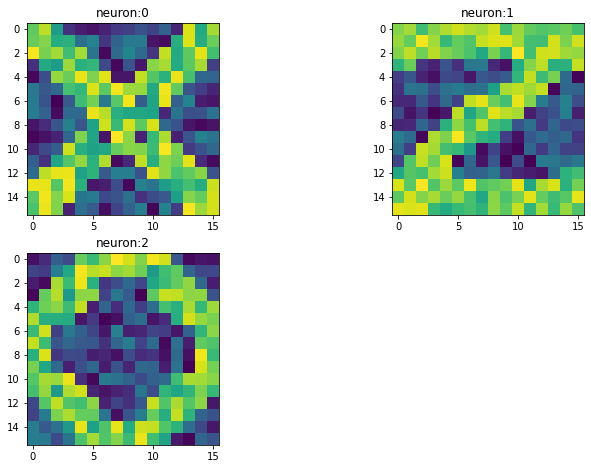

1.08576181 -1.19712967


In [31]:
fig = plt.figure(figsize=(12,12))
axes = []
row = 3
col = n2//row + 1
max_ = np.max(synapse.weight)
min_ = np.min(synapse.weight)
for num in range(n2):
    learned_img = np.interp(synapse.weight[num,:].reshape(16,16),[wmin,wmax],[0,255])    
    axes.append(fig.add_subplot(row,col,num+1))
    #axes[num].imshow(learned_img,cmap='Greys')
    axes[num].imshow(learned_img)
    axes[num].set_title(f"neuron:{num}")

plt.show()

print(max_, min_)

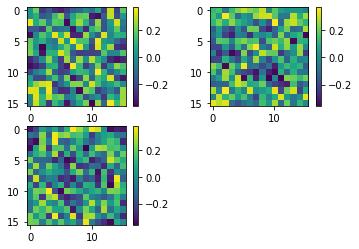

In [23]:
plt.figure(2)
for i in range(3):
    plt.subplot(3//2+1, 3%2+1, i+1)
    plt.gca().grid(False)
    weights = np.array(synapse.weight[i])
    weights = np.reshape(weights, (16,16))
    img = np.zeros((16,16))
    for i in range(16):
        for j in range(16):
            img[i][j] = np.interp(weights[i][j], [wmin,wmax], [-1.0,1.0])
    plt.imshow(img)
    plt.colorbar()
plt.show()

In [6]:
learn = True
inhibit = True
n_epoch = 1

for epoch in tqdm(range(n_epoch)):
    for num in range(1):
        winner = -1
        if not inhibit:
            #winner = 100
            pass
        
        
        image = cv2.imread(f"data2/{num}.png",0)
        image = RF_convolution(image,RF_kernel)
        input_spiketrain = encode(image,train_param)
        adaptation = 1

        synapse.reset_all_neurons()
        
        output_spiketrain = []
        for timestep,t in enumerate(timeline):
            input_spikes = input_spiketrain[:,timestep] # size = (n1, 1)
            result = synapse.run(input_spikes,
                                 t,
                                 scale = adaptation,
                                 lateral_inhibition = (winner == -1))
            
            
            if not result['winner'] == -1:
                winner = result['winner']
                #print(f'winner: {winner}')
                
                
            if learn:
                #print(f"epoch: {epoch} | num: {num} | time: {t} | weight: {synapse.weight[2,150]:.5f}")    
                #for out_idx,has_spiked in enumerate(result['output']):
                for out_idx in range(3):
                    has_spiked = spikerecord[out_idx,timestep]
                    if(has_spiked==1): #SPIKE
                        print("dfsdgdfssdgf")
                        for delta_t in range(-dt-dt,t_past-dt, -dt): #delta_t < 0
                            if 0 <= t+delta_t <= T:
                                tick = int(delta_t//dt)
                                for in_idx in range(n1):
                                    if input_spiketrain[in_idx,timestep+tick] == 1:
                                        dw = learning_rule(delta_t)
                                        w = synapse.weight[out_idx, in_idx]
                                        assert dw>0
                                        synapse.weight[out_idx, in_idx] = update(w,dw,adaptation) 
                        for delta_t in range(dt+dt,t_future+dt,dt): #delta_t > 0
                            if 0 <= t+delta_t <= T:
                                tick = int(delta_t//dt)
                                for in_idx in range(n1):
                                    if input_spiketrain[in_idx,timestep+tick] == 1:
                                        dw = learning_rule(delta_t)
                                        w = synapse.weight[out_idx, in_idx]
                                        assert dw<0
                                        synapse.weight[out_idx, in_idx] = update(w,dw,adaptation) 
                                        
            #print("end time")
        winner = 0
        if winner != -1:
        #if False:
            input_spike_count = np.sum(input_spiketrain,axis=1) == 0
            zero_spike_inputs = np.nonzero(input_spike_count)[0]
            for i in zero_spike_inputs:
                    synapse.weight[winner,i] = \
                    max(synapse.weight[winner,i]-(0.06*adaptation) , wmin)
        #print("end image")

100%|██████████| 1/1 [00:00<00:00, 78.47it/s]

dfsdgdfssdgf


In [7]:
synapse.weight

array([[ 4.18591992e-01,  7.20324493e-01,  1.14374817e-04,
         2.42332573e-01,  8.67558908e-02,  3.23385948e-02,
         1.26260211e-01,  2.85560727e-01,  3.36767474e-01,
         4.78816734e-01,  3.59194514e-01,  6.25219500e-01,
         1.44452250e-01,  8.78117436e-01,  2.73875932e-02,
         6.71786132e-01,  4.17304802e-01,  5.58689828e-01,
         1.40386939e-01,  1.98101489e-01,  7.40744569e-01,
         9.08261576e-01,  2.53424178e-01,  6.32322616e-01,
         8.16389152e-01,  8.34606664e-01,  2.50442114e-02,
        -2.09452168e-02,  1.69830420e-01,  8.78142503e-01,
         9.83468338e-02,  4.21107625e-01,  9.57889530e-01,
         5.33165285e-01,  6.91877114e-01,  3.15515631e-01,
         6.86500928e-01,  7.74625672e-01, -4.17117227e-02,
         6.90144315e-01,  9.28861089e-01,  6.88165654e-01,
         2.20443992e-01,  7.89279328e-01,  1.03226007e-01,
         4.47893526e-01,  9.08595503e-01,  2.93614148e-01,
         2.27775339e-01,  1.30028572e-01,  1.93669579e-0

In [8]:
target_weight = np.array([[ 4.18591992e-01,  7.20324493e-01,  1.14374817e-04,
         2.42332573e-01,  8.67558908e-02,  3.23385948e-02,
         1.26260211e-01,  2.85560727e-01,  3.36767474e-01,
         4.78816734e-01,  3.59194514e-01,  6.25219500e-01,
         1.44452250e-01,  8.78117436e-01,  2.73875932e-02,
         6.71786132e-01,  4.17304802e-01,  5.58689828e-01,
         1.40386939e-01,  1.98101489e-01,  7.40744569e-01,
         9.08261576e-01,  2.53424178e-01,  6.32322616e-01,
         8.16389152e-01,  8.34606664e-01,  2.50442114e-02,
        -2.09452168e-02,  1.69830420e-01,  8.78142503e-01,
         9.83468338e-02,  4.21107625e-01,  9.57889530e-01,
         5.33165285e-01,  6.91877114e-01,  3.15515631e-01,
         6.86500928e-01,  7.74625672e-01, -4.17117227e-02,
         6.90144315e-01,  9.28861089e-01,  6.88165654e-01,
         2.20443992e-01,  7.89279328e-01,  1.03226007e-01,
         4.47893526e-01,  9.08595503e-01,  2.93614148e-01,
         2.27775339e-01,  1.30028572e-01,  1.93669579e-02,
         6.78835533e-01,  2.11628116e-01,  2.65546659e-01,
         4.31573159e-01, -6.63745488e-03,  5.14117605e-01,
         8.67285749e-02,  5.89305537e-01,  6.99758360e-01,
         1.02334429e-01,  4.14055988e-01,  6.94400158e-01,
         3.54179270e-01, -1.00465411e-02,  4.75896406e-01,
         6.63794645e-01,  5.14889112e-01,  9.44594756e-01,
         5.86555041e-01,  9.03401915e-01,  7.74747041e-02,
         7.92763473e-02,  8.07391289e-01,  3.97676837e-01,
         1.65354197e-01,  9.27508580e-01,  3.47765860e-01,
         6.90812103e-01,  6.65997985e-01,  8.23306091e-01,
         5.63672207e-01,  6.90942434e-01,  3.48898342e-01,
         2.69927892e-01,  8.95886218e-01,  4.31560827e-01,
         9.64840047e-01,  6.63441498e-01,  6.24738019e-01,
         1.14745973e-01,  9.49489259e-01,  4.49912133e-01,
         5.18389614e-01,  3.48136803e-01,  1.77026980e-01,
         8.43379521e-01,  5.13679487e-01, -5.71296730e-02,
         5.57144914e-01,  3.26644902e-01,  5.30309293e-01,
         8.25942099e-01,  3.60895720e-01,  9.10944316e-01,
         5.63360116e-01,  2.02008743e-02,  9.29437234e-01,
         6.30896918e-01,  9.37322850e-01,  1.12340508e-01,
         7.71357496e-02,  8.72595463e-01,  6.36818161e-01,
         6.00017272e-03,  6.95463053e-01,  6.93876188e-01,
         9.23024536e-01,  7.14368780e-01,  1.24270962e-01,
         1.98801338e-02,  3.05676853e-02,  2.83064880e-02,
         1.86211068e-01,  8.00027949e-01,  4.78831064e-01,
         4.92821979e-01,  7.82030892e-01,  6.41733151e-02,
         2.19183679e-01,  5.25759271e-01,  9.09595748e-01,
         5.01030219e-01,  1.86472894e-02,  8.03280008e-01,
         2.32974274e-01,  8.07105196e-01,  3.91419082e-01,
         8.63541855e-01,  6.87121643e-01,  4.96240234e-01,
         7.64552257e-02, -8.23104878e-05,  6.13434557e-02,
        -1.54481215e-02,  4.74941291e-02,  1.65709339e-01,
         6.52988980e-01,  5.59716982e-01,  1.69428189e-02,
         1.19742797e-02,  9.69555837e-01,  5.71261060e-01,
         1.43293235e-01,  2.56183345e-01,  7.43825854e-01,
         1.35429481e-01,  5.21358927e-01,  9.10019989e-01,
         7.86828801e-01,  1.79847759e-01,  4.33769714e-01,
         5.59955718e-01,  8.28980900e-01,  1.56791395e-01,
         1.85762022e-02,  7.42821388e-02,  4.86345111e-01,
         6.06329462e-01,  5.72010378e-01,  3.17362409e-01,
         9.88616154e-01,  5.79745219e-01,  3.20141173e-01,
         4.90948219e-01,  6.85334431e-01,  6.09232893e-01,
         2.04919558e-01,  6.63348344e-02,  3.70084198e-01,
         6.29717507e-01,  2.10174010e-01,  7.52755554e-01,
         6.53648135e-03,  2.00315099e-01,  8.04754564e-01,
         1.93434283e-01,  6.39460881e-01,  5.24670309e-01,
         9.24807970e-01,  2.03296770e-01,  5.96109068e-03,
         6.75065963e-01,  7.72178030e-01,  9.07815853e-01,
         9.31972069e-01,  1.39515730e-02,  2.34362086e-01,
         5.56778357e-01,  8.89016321e-01,  8.90176119e-01,
         4.96653188e-01,  9.15606350e-01,  6.41566209e-01,
         3.90007714e-01,  4.85990667e-01,  6.04310483e-01,
         4.89547922e-01,  9.26181427e-01,  9.18733436e-01,
         3.94875613e-01,  9.63262528e-01,  1.73955667e-01,
         6.63295194e-02,  7.50791580e-02,  4.45662166e-01,
        -3.84751947e-02,  8.87970211e-01,  7.67115471e-01,
         1.50189807e-02,  1.76196256e-01,  3.32063574e-01,
         1.30996845e-01,  8.09490692e-01,  3.44736653e-01,
         9.40107482e-01,  5.82014180e-01,  8.78831984e-01,
         7.84734445e-01,  8.45392319e-01,  3.99880266e-01,
         4.86346816e-01,  7.38603591e-01,  2.25718852e-01,
         4.30253523e-01,  5.39110308e-01,  1.55332756e-02,
         5.93481408e-01,  4.33676349e-01,  8.07360529e-01,
         3.16915732e-01,  8.92888709e-01,  5.77857215e-01,
         1.24010202e-01,  7.27929234e-01,  5.52031177e-01,
        -6.09072793e-03,  3.60193680e-01,  6.19068837e-01,
         8.58601778e-01, -5.95979751e-02,  9.16759149e-01,
         3.16580315e-01,  9.73783538e-01,  6.04716101e-01,
         8.30007351e-01],
       [ 5.74711505e-01,  6.28076198e-01,  2.85576282e-01,
         5.86833341e-01,  7.50021764e-01,  8.58313836e-01,
         7.55082188e-01,  6.98057248e-01,  8.64479430e-01,
         3.22680997e-01,  6.70788791e-01,  4.50873936e-01,
         3.82102752e-01,  4.10811350e-01,  4.01479583e-01,
         3.17383946e-01,  6.21919368e-01,  4.30247271e-01,
         9.73802078e-01,  6.77800891e-01,  1.98569888e-01,
         4.26701009e-01,  3.43346240e-01,  7.97638804e-01,
         8.79998289e-01,  9.03841956e-01,  6.62719812e-01,
         2.70208262e-01,  2.52366702e-01,  8.54897943e-01,
         5.27714646e-01,  8.02161084e-01,  5.72488517e-01,
         7.33142525e-01,  5.19011627e-01,  7.70883911e-01,
         5.68857991e-01,  4.65709879e-01,  3.42688908e-01,
         6.82093484e-02,  3.77924179e-01,  7.96260777e-02,
         9.82817114e-01,  1.81612851e-01,  8.11858698e-01,
         8.74961645e-01,  6.88413252e-01,  5.69494413e-01,
         1.60971437e-01,  4.66880023e-01,  3.45172051e-01,
         2.25039958e-01,  5.92511869e-01,  3.12269838e-01,
         9.16305553e-01,  9.09635525e-01,  2.57118294e-01,
         1.10891301e-01,  1.92962732e-01,  4.99584171e-01,
         7.28585668e-01,  2.08194438e-01,  2.48033558e-01,
         8.51671875e-01,  4.15848718e-01,  6.16685067e-01,
         2.33666139e-01,  1.01967259e-01,  5.15857017e-01,
         4.77140987e-01,  1.52671644e-01,  6.21806232e-01,
         5.44010119e-01,  6.54137347e-01,  1.44545540e-01,
         7.51527817e-01,  2.22049140e-01,  5.19351824e-01,
         7.85296028e-01,  2.23304280e-02,  3.24362460e-01,
         8.72922376e-01,  8.44709608e-01,  5.38440593e-01,
         8.66608274e-01,  9.49805991e-01,  8.26406998e-01,
         8.54115444e-01,  9.87434018e-02,  6.51304332e-01,
         7.03516988e-01,  6.10240813e-01,  7.99615262e-01,
         3.45712199e-02,  7.70238735e-01,  7.31728601e-01,
         2.59698393e-01,  2.57069299e-01,  6.32303317e-01,
         3.45297462e-01,  7.96588678e-01,  4.46146232e-01,
         7.82749415e-01,  9.90471784e-01,  3.00248340e-01,
         1.43005828e-01,  9.01308436e-01,  5.41559379e-01,
         9.74740371e-01,  6.36604400e-01,  9.93913025e-01,
         5.46070804e-01,  5.26425934e-01,  1.35427903e-01,
         3.55705171e-01,  2.62185673e-02,  1.60395180e-01,
         7.45637193e-01,  3.03996899e-02,  3.66543097e-01,
         8.62346253e-01,  6.92677718e-01,  6.90942142e-01,
         1.88636801e-01,  4.41904281e-01,  5.81577407e-01,
         9.89751708e-01,  2.03906225e-01,  2.47732902e-01,
         2.62173084e-01,  7.50172413e-01,  4.56975327e-01,
         5.69294384e-02,  5.08516241e-01,  2.11960165e-01,
         7.98604245e-01,  2.97331382e-01,  2.76060120e-02,
         5.93432449e-01,  8.43840429e-01,  3.81016124e-01,
         7.49858311e-01,  5.11141478e-01,  5.40951805e-01,
         9.59434321e-01,  8.03960891e-01,  3.23230666e-02,
         7.09387251e-01,  4.65001482e-01,  9.47548941e-01,
         2.21432734e-01,  2.67072020e-01,  8.14739649e-02,
         4.28618829e-01,  1.09018764e-01,  6.33786761e-01,
         8.02963237e-01,  6.96800496e-01,  7.66211381e-01,
         3.42454120e-01,  8.45851483e-01,  4.28768775e-01,
         8.24009870e-01,  6.26496159e-01,  1.43423049e-01,
         7.83868999e-02,  1.83326429e-02,  6.67249976e-02,
         4.58583814e-01,  1.13341923e-01,  2.77833488e-02,
         7.54861481e-01,  3.94850480e-01,  7.46938496e-01,
         4.52404827e-01,  4.50086747e-01,  4.78072507e-01,
         4.74003927e-01,  8.03163342e-01,  4.02392520e-01,
         9.04686160e-01,  3.70610480e-02,  7.73874343e-01,
         1.25641381e-01,  6.18513567e-01,  1.03642613e-02,
         5.38627283e-01,  3.01795662e-03,  9.51193785e-01,
         9.05402034e-01,  7.95966942e-01,  9.15274320e-01,
         1.45558231e-01,  1.57730070e-01,  1.87631673e-01,
         6.22495902e-01,  9.05809496e-01,  9.89955178e-01,
         7.11122459e-01,  7.31800409e-01,  9.09293205e-01,
         4.00873732e-01,  2.49850680e-01,  1.73430171e-01,
         1.19457050e-01,  8.12610588e-01,  1.46792373e-01,
         2.64297483e-01,  8.19089179e-01,  3.10587252e-01,
         9.82417449e-01,  2.66638702e-01,  5.33653345e-01,
         3.14467011e-01,  9.10772831e-01,  3.66556644e-01,
         4.33592327e-01,  5.12292692e-01,  9.38886477e-01,
         3.09490063e-02,  7.16878664e-01,  8.91018954e-01,
         2.72872235e-02,  5.22051247e-01,  3.25989812e-01,
         8.59489321e-01,  5.58516551e-01,  6.90227868e-01,
         4.52853500e-01,  6.28309038e-01,  2.90096852e-01,
         9.34857797e-03,  5.76755935e-01,  3.11444214e-01,
         5.17267599e-01,  9.16405853e-01,  4.26474789e-01,
         2.47396037e-01,  3.71293761e-01,  9.31861117e-01,
         9.36868381e-01,  8.44329949e-01,  9.20206514e-01,
         2.27900290e-01,  8.74822096e-02,  2.27309736e-01,
         3.14376616e-01,  1.74765876e-01,  6.07094162e-01,
         4.13586415e-01,  8.16351512e-01,  1.85130398e-01,
         7.01876530e-01,  2.40355625e-01,  5.74219089e-01,
         3.48987597e-01],
       [ 5.69643995e-02,  2.28813671e-01,  6.64102555e-01,
         4.97250093e-01,  5.19015984e-01,  1.74720150e-01,
         5.70715852e-01,  9.96753425e-01,  8.16835109e-01,
         5.94372624e-01,  9.75989068e-01,  9.01562585e-01,
         5.95607934e-01,  3.24263253e-02,  9.35770958e-02,
         6.53717150e-02,  4.51733149e-01,  3.75434833e-01,
         9.75350034e-01,  1.67983293e-01,  9.72787592e-01,
         7.67474869e-01,  8.24237840e-01,  6.32615817e-01,
         6.68732770e-01,  4.76882334e-01,  1.31363569e-02,
         3.53006086e-01,  4.92071801e-01,  7.30091211e-01,
         4.68628343e-01,  4.57404916e-01,  1.37662741e-01,
         1.08887338e-02,  7.58278260e-01,  3.19952838e-01,
         9.84383450e-01,  2.20234226e-01,  3.38708025e-01,
         5.23896136e-01,  7.54891457e-01,  4.63857784e-01,
         1.24822543e-01,  3.12501378e-01,  5.04519170e-01,
         6.73849008e-01,  7.70149956e-01,  1.30335781e-01,
         2.29151313e-02,  5.19082322e-01,  8.09988711e-01,
         1.26037670e-02,  6.72469845e-01,  6.86808227e-01,
         4.49246754e-01,  9.14788687e-01,  6.44361085e-01,
         5.23983765e-03,  4.84428446e-01,  8.59317806e-01,
         8.30399570e-01,  6.49154197e-01,  6.73698424e-01,
         5.78499580e-01,  2.74119775e-01,  5.60529991e-01,
         6.71729785e-01,  3.52429630e-01,  8.55828367e-01,
         1.95037486e-01,  7.47320810e-01,  2.89602746e-01,
         7.73799287e-01,  4.27737329e-01,  8.07698409e-01,
         3.53534863e-01,  2.13693238e-01,  7.67284508e-01,
         3.08641948e-01,  7.33245068e-01,  7.44473153e-01,
         2.21396701e-01,  2.14112137e-01,  1.98947923e-01,
         1.42518338e-01,  3.77082599e-01,  2.66278847e-02,
         1.10920369e-01,  6.74564024e-01,  7.99776537e-01,
         8.05295271e-02,  2.31702310e-01,  2.07625662e-01,
         9.17333563e-01,  7.11314518e-01,  5.53884611e-01,
         3.04517988e-01,  8.34854048e-01,  4.35305958e-01,
         9.23456215e-01,  7.06051804e-01,  4.78031308e-01,
         1.26210104e-01,  9.76043550e-01,  1.59833650e-01,
         2.02602125e-01,  4.31181755e-01,  4.04201906e-01,
         1.46751481e-01,  7.29318919e-01,  1.88745067e-01,
         6.43895644e-01,  7.54305951e-01,  2.10732392e-01,
         6.00954248e-01,  7.48928375e-01,  6.38218711e-01,
         5.97127303e-01,  2.95482286e-01,  7.31606471e-01,
         9.45308440e-01,  4.25561390e-01,  7.82181817e-01,
         5.61410397e-02,  8.35271602e-01,  1.92250017e-01,
         3.95096869e-01,  3.00081046e-01,  8.01036438e-02,
         9.04631003e-01,  3.70154178e-01,  5.30697438e-01,
         4.94116266e-01,  1.32161142e-01,  2.06454059e-01,
         7.61888090e-02,  5.07921700e-01,  2.61549552e-01,
         3.57061609e-01,  1.08065329e-01,  7.87551840e-01,
         1.06583877e-01,  9.85708824e-01,  1.77161164e-01,
         5.72405112e-01,  4.48453346e-02,  7.87116290e-01,
         1.89605948e-01,  5.27903978e-01,  7.40077543e-01,
         1.49931485e-01,  5.51087174e-01,  2.16617208e-01,
         7.59196049e-01,  7.22915194e-01,  1.76549034e-01,
         8.61966558e-01,  1.97750995e-02,  8.60236997e-01,
         5.58903811e-01,  4.03220472e-01,  7.58746931e-01,
         7.16929002e-01,  9.87326175e-01,  2.78085049e-01,
         3.79367241e-03,  9.33902608e-01,  8.57897105e-01,
         7.28850878e-01,  5.16688783e-01,  7.06956245e-01,
         7.80529557e-01,  3.74875944e-01,  7.70322525e-01,
         7.50624319e-01,  6.13211212e-01,  4.01865924e-01,
         6.97308019e-01,  3.11285783e-03,  7.74896647e-01,
         8.96416602e-01,  2.39315707e-01,  1.20767184e-01,
         2.20283988e-01,  3.02096731e-01,  8.83028509e-01,
         5.43166430e-01,  2.86711650e-01,  1.38354690e-01,
         2.90144463e-01,  6.13871090e-01,  3.24138530e-01,
         4.57360182e-01,  4.44117107e-01,  8.28135361e-01,
         4.26348154e-01,  3.45698821e-01,  6.74971605e-01,
         2.21482056e-01,  4.67245824e-01,  3.14765687e-01,
         6.26855602e-01,  8.77360475e-01,  4.47689000e-01,
         7.84457419e-01,  4.56965701e-01,  6.56229332e-01,
         1.31840975e-01,  4.32981507e-01,  9.09311989e-01,
         6.05479001e-01,  7.66774587e-01,  5.04700608e-01,
         4.98055625e-01,  8.42899840e-01,  6.78069343e-02,
         5.73272272e-01,  9.42762575e-01,  5.17860048e-01,
         1.94465810e-01,  8.47939392e-01,  2.51639142e-01,
         7.00726036e-01,  5.40260940e-01,  9.48836288e-01,
         6.24336702e-01,  8.37977962e-01,  7.93287619e-03,
         9.89340056e-01,  7.77145703e-02,  3.22129514e-01,
         9.46152395e-01,  8.93910237e-03,  8.22730005e-01,
         8.61211638e-01,  4.39830814e-01,  2.55745194e-01,
         8.02689520e-01,  4.77862004e-01,  1.34338609e-01,
         9.27848993e-01,  8.95969967e-01,  4.91545150e-01,
         8.56702497e-01,  4.18578026e-01,  6.83464900e-01,
         3.97990639e-01,  5.05742017e-01,  1.89551703e-01,
         9.64988924e-01,  2.94215688e-01,  1.03459556e-01,
         1.44315400e-01,  1.40922942e-02,  7.15945699e-01,
         5.64498320e-01]])